# Video game sales analysis

## Project information

### Briefing

It's 2016 and I work at Ice, a video game shop. I am tasked with identifying the patterns that determine whether a game will be a success. Once I figure it out, I can choose the most potential game to promote in the coming year.

### Data description

Variables in the dataset:
- `Name`: video game title
- `Platform`
- `Year_of_Release`
- `Genre`
- `NA_sales`: sales in North America, in million US dollars
- `EU_sales`: sales in the European Union, in million US dollars
- `JP_sales`: sales in Japan, in million US dollars
- `Other_sales`: sales in other regions, in million US dollars
- `Critic_Score`: critics' approval of the game with a maximum score of 100
- `User_Score`: players' approval of the game with a maximum score of 10
- `Rating`: rating issued by rhe Entertainment Software Rating Board

2016 data may be incomplete.

### Objective

Selecting one title to be given a promotional campaign in 2017.

## Importing libraries

In [292]:
import pandas as pd # for dataframe manipulation
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for data visualization
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as st # for statistical analyses

## Loading dataset

In [293]:
data = pd.read_csv('games.csv')

## Data preprocessing

### Preliminary checking

In [294]:
print('Shape:')
print(data.shape)
print()

print(data.info())
print()

print('Missing values count:')
print(data.isna().sum())
print()

print('Explicit duplicates:')
print(data.duplicated().sum())

data.head(5)

Shape:
(16715, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Missing values count:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
C

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Things to note:
1. Column names are not written in snake case.
1. There are numerous missing values in `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, and `Rating`.
1. `User_Score` is listed as `object` (cf. `Critic_Score` which is `float64`). 
1. `Year_of_Release` has the wrong data type (`float64`) due to the presence of missing values.
1. Some of the titles in `name` have unnecessary details or are unnecessarily divided into separate entries.

### Data cleaning & feature engineering

#### Column name conversion
Column names need to be changed to snake case, or more precisely, lower case.

In [295]:
column_list = data.columns.tolist()
data.columns = [column.lower() for column in column_list]
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


#### Handling missing values & data type conversion

##### `name` & `genre`

In [296]:
data.query('name.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


These 2 rows practically contain no useful information, so they will be dropped. This will also eliminate all of the 2 `NaN` values in `genre`.

In [297]:
data = data.query('name.isna() != True')
print(data['name'].isna().sum())
print(data['genre'].isna().sum())

0
0


##### `year_of_release`

In [298]:
print(len(data.query('year_of_release.isna() == True')))
data.query('year_of_release.isna() == True').head(20)

269


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [299]:
print(data.query('platform == "PC"')['year_of_release'].min())
print(data.query('platform == "PC"')['year_of_release'].max())
data.query('platform == "PC"')['year_of_release'].median()

1985.0
2016.0


2010.0

Some values in `year_of_release` seem to be missing completely at random, such that even games with their release date explicitly mentioned on their titles (e.g. FIFA Soccer **2004**) have `NaN` in the column. This could hint at a possible error in data collection.

These values will be filled with the placeholder value of `0` to avoid data distortion.

In [300]:
data['year_of_release'].fillna(0, inplace=True)

In [301]:
print(data['year_of_release'].isna().sum())
data

0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [302]:
# Converting data type to integer
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


##### `critic_score`

In [303]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


`critic_score` contains a large number of missing values (~51% of the whole data). Rows with such values are generally classic Nintendo games (Super Mario, Pokemon) that sell well to lesser-known titles from various platforms, years, and genres. It can be assumed that the values are missing at random due to the inavailability of data.

Since we'll need to analyze the correlation between scores and sales later, the values should be left as is, not filled, to avoid distortion.

##### `user_score`

In [304]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [305]:
print(data['user_score'].unique())
data[data['user_score'] == 'tbd']

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


`user_score` has less missing values than the previous column. Another thing to note is that the column is listed as `object`, caused by the `tbd` value in the column. `tbd` (to be determined) possibly indicates that user scores were yet to be compiled at the time. Thus, they can be treated no differently than the other `NaN` values, but they first need to be converted to `NaN` to make `user_score` a proper numeric column.

In [306]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 
# `errors` parameter to convert the non-numeric values to NaN

data.info()
data[data['user_score'] == 'tbd']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


##### `rating`

In [307]:
print(data['rating'].unique())
data[data['rating'].isna()]

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


The missing values in `rating` can be explained by the following reasons:
- ESRB (est. 1994) was yet to be founded  at the time of the game's release.
- The game was released outside of North America, which is ESRB's operational area.
- The game publisher not applying for a rating by ESRB.

The missing values can be filled with the placeholder `none`.

It is also worth noting that the rating `K-A` has been changed to `E` in 1998. To simplify further analyses, `K-A` will be merged with `E`.

In [308]:
data['rating'].fillna('none', inplace=True)
data['rating'].replace('K-A', 'E', inplace=True)

data.info()
data[data['rating'] == 'K-A']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Unnecessary information in `name`

In [309]:
data.loc[[1429, 8963]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1429,Dance Dance Revolution (Japan),PS,1999,Simulation,0.00,0.00,1.26,0.09,NaN,NaN,none
8963,Dance Dance Revolution (North America),PS,2001,Simulation,0.08,0.06,0.00,0.01,NaN,NaN,none


In [310]:
data[data['name'].str.contains('\(', case=False)].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,none
342,Star Wars Battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,none
416,Gran Turismo (PSP),PSP,2009,Racing,0.50,1.58,0.31,0.87,NaN,NaN,none
603,Ghostbusters: The Video Game (DS Version),X360,2009,Action,1.04,1.22,0.03,0.27,NaN,NaN,none
639,Need for Speed (2015),PS4,2015,Racing,0.50,1.50,0.05,0.37,NaN,NaN,none
646,Tomb Raider (2013),PS3,2013,Action,0.60,1.26,0.08,0.48,NaN,NaN,none
788,Project Gotham Racing (JP weekly sales),XB,2002,Action,1.54,0.44,0.04,0.07,NaN,NaN,none
828,Ghostbusters: The Video Game (DS Version),PS3,2010,Action,0.60,0.96,0.13,0.36,NaN,NaN,none
910,Tomb Raider (2013),X360,2013,Action,0.86,0.84,0.01,0.17,NaN,NaN,none
920,Medal of Honor: European Assault (All Region s...,PS2,2005,Shooter,0.89,0.69,0.09,0.21,NaN,NaN,none


All game titles in `name` are supposed to contain *only* the title itself. Year of release, platform, and sales details in the `name` field can cause them to be treated as different titles and hinder analyses. However, due to the complexity of the issue, we have no choice but to leave them be.

#### Adding all sales into one column

We'll need to know the combined sales of all the regions to conduct certain analyses. Totaling the sales from every region should be useful.

In [311]:
data['total_sales'] = (data['na_sales'] + data['eu_sales'] +
                       data['jp_sales'] + data['other_sales'])
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


### Summary of changes

The following changes were made in the data cleaning phase:
1. Column names were converted to snake case/lower case letters.
1. Two rows containing `NaN` values in `name` and `genre` were dropped.
1. The missing values in `year_of_release` were filled with the placeholder value of `0`.
1. `year_of_release` was converted to `int32`.
1. Missing values in `critic_score` and `user_score` were left as is.
1. `tbd` values in `user_score` were replaced by `NaN`, and the column's data type was changed to `float64`.
1. `NaN` values in `rating` were filled with the placeholder value `none`.
1. `K-A`, the former name for `E` rating, was changed to `E`.
1. The combined sales of all regions were aggregated in the `total_sales` column.

## EDA & hypothesis testing

**Questions:**
1. How many games were released per year?
1. How long does it take for a platform's popularity to wane? How long does it take for a new platform to be released?
1. Which timeframe would be the most relevant to predict sales in 2017?
1. Which platforms are growing or waning in popularity? Which platforms have the most potential to bring in profit?
1. How do sales differ by platform?
1. How do critics' and users' rating of the game affect sales?
1. How do sales differ between genres?
1. What are the most popular titles recently?

We will also create **user profiling by region (NA, EU, JP)** to determine:
1. the top 5 platforms
1. the top 5 genres
1. the effects of ESRB rating on sales.

**Hypotheses:**
1. The mean user rating of Xbox One and PC titles are the same.
1. The mean user rating of action and sports genres are different.

### 1. Number of release by year

In [312]:
# Aggregating games by year
games_by_year = pd.pivot_table(data=data, index='year_of_release', values='name', aggfunc='count')
games_by_year.columns = ['games_count']
games_by_year = games_by_year.reset_index()
games_by_year

,year_of_release,games_count
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


In [313]:
# Displaying the five-number summary
games_by_year.describe()

,year_of_release,games_count
count,38.000000,38.000000
mean,1945.421053,439.815789
std,324.294213,446.367916
min,0.000000,9.000000
25%,1988.250000,37.250000
50%,1997.500000,313.500000
75%,2006.750000,734.750000
max,2016.000000,1427.000000


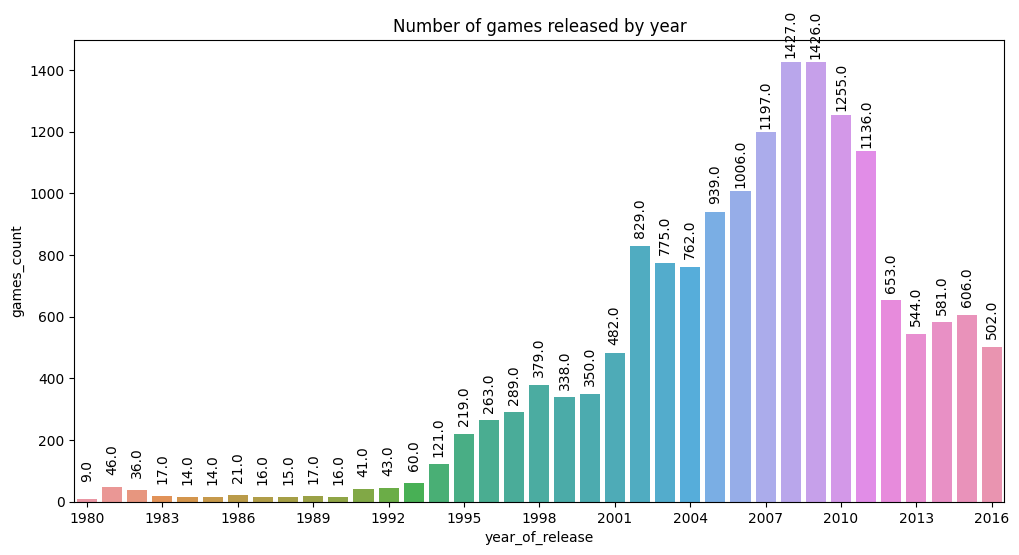

In [314]:
# Visualizing data
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=games_by_year.query('year_of_release > 0'), x='year_of_release', y='games_count')

# Reducing the number of labels on the x-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

# Annotating bars
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=90, 
                   textcoords = 'offset points')

plt.title('Number of games released by year')

plt.show()

**Findings and insights:** 
In a timespan ranging from 1980 to 2016, an average of around 451 recorded titles were published each year. Video game production nearly doubled in 2002 and reached an all time high in 2009, but dropped significantly in 2012 and has been stagnating in number ever since.

Some periods without any major releases may hold little significance.

### 2. Platform lifespan

In [315]:
# Aggregating data
platform_query = ('(platform == "PS") | (platform == "PS2") | (platform == "X360") | (platform == "PS3") | (platform == "PS4") | (platform == "XOne") | (platform == "Wii")')

platform_sales_by_year = pd.pivot_table(data=data.query(platform_query), 
                                   index=['platform', 'year_of_release'], 
                                   values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                                   aggfunc='sum')

platform_sales_by_year = platform_sales_by_year.reset_index()

platform_sales_by_year['total_sales'] = (platform_sales_by_year['na_sales'] + platform_sales_by_year['eu_sales'] +
                                    platform_sales_by_year['jp_sales'] + platform_sales_by_year['other_sales'])
platform_sales_by_year

,platform,year_of_release,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,PS,0,1.22,0.04,1.80,0.22,3.28
1,PS,1994,1.20,2.67,1.76,0.40,6.03
2,PS,1995,9.85,9.54,14.61,1.96,35.96
3,PS,1996,25.92,17.82,45.42,5.54,94.70
4,PS,1997,37.14,33.10,58.06,7.87,136.17
...,...,...,...,...,...,...,...
64,X360,2016,0.71,0.00,0.69,0.12,1.52
65,XOne,2013,5.34,0.02,11.85,1.75,18.96
66,XOne,2014,18.15,0.14,30.97,4.81,54.07
67,XOne,2015,18.47,0.17,36.03,5.47,60.14


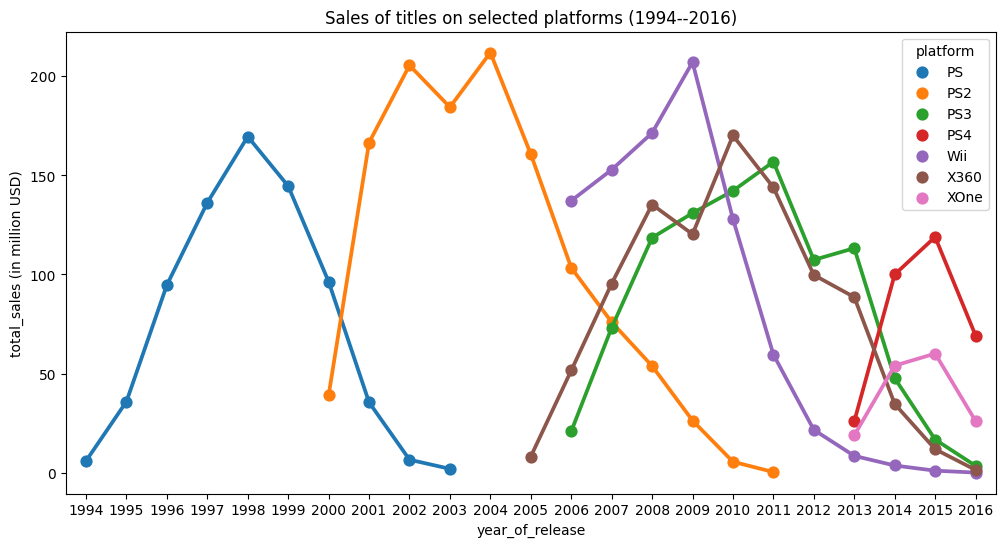

In [369]:
# Visualizing data
plt.figure(figsize=(12, 6))

ax = sns.pointplot(data=platform_sales_by_year.query('year_of_release > 0'), 
                   x='year_of_release', y='total_sales', hue='platform')

# Reducing the number of labels on the x-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title('Sales of titles on selected platforms (1994--2016)')
plt.ylabel('total_sales (in million USD)')

plt.show()

We'll take 3 of the most successful platform lines (PlayStation, Wii, and XBOX) from the previous section and analyze their sales throughout their lifespan.

**Findings:**
1. The approximate lifespan of selected platforms:
    1. PS: 9 years
    1. PS2: 11 years
    1. PS3: 10 years
    1. Wii: 10 years
    1. XBOX 360: 11 years
1. The approximated time it takes for a new generation to be released:
    1. PS: 6--7 years
    1. XBOX: 8 years

**Insights:**
1. On average, platforms have a 10-year lifespan before their sales go below the \\$1 million mark.
1. A new generation of platforms usually gets released within a decade of the previous generation's release.

**Recommendations:**

As the latest generation of platforms are still well within their 10-year lifespan, it should be safe to market games available on such platforms.

### 3. Setting the time period of further analyses

To reflect the findings of the previous section, we'll limit further analyses from the time of the latest generation's release, which is **2013 onwards**. This will ensure that the data are still relevant to today's trends.

However, it should be noted that the data for 2016 may not be complete since the year hasn't ended yet. This may result in seemingly decreasing sales. Definitive trend analyses should then be limited to the previous year (2015), with 2016's results being taken with caution.

In [319]:
recent_data = data[data['year_of_release'] >= 2013]
recent_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,none,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,none,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,none,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,none,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,none,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,none,0.01


### 4. Popular platforms with potential

In [320]:
# Aggregating data
recent_sales_by_platform = pd.pivot_table(data=recent_data, 
                                   index='platform', 
                                   values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                                   aggfunc='sum')

recent_sales_by_platform['total_sales'] = (recent_sales_by_platform['na_sales'] + recent_sales_by_platform['eu_sales'] +
                                           recent_sales_by_platform['jp_sales'] + recent_sales_by_platform['other_sales'])

recent_sales_by_platform = recent_sales_by_platform.sort_values(by='total_sales', ascending=False)
recent_sales_by_platform = recent_sales_by_platform.reset_index()
recent_sales_by_platform

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,PS4,141.09,15.96,108.74,48.35,314.14
1,PS3,67.81,23.35,63.50,26.77,181.43
2,XOne,51.59,0.34,93.12,14.27,159.32
3,3DS,30.96,67.81,38.20,6.28,143.25
4,X360,42.52,0.51,81.66,12.11,136.80
5,WiiU,19.85,10.88,29.21,4.69,64.63
6,PC,25.36,0.00,11.11,2.96,39.43
7,PSV,6.10,18.59,5.04,3.26,32.99
8,Wii,5.93,0.05,6.56,1.12,13.66
9,PSP,0.17,3.29,0.00,0.04,3.50


We will take the top 10 of the recent platforms and see their sales trends.

In [321]:
# Aggregating data
platform_query = ('(platform == "PS4") | (platform == "PS3") | (platform == "XOne") | (platform == "3DS") | (platform == "X360") | (platform == "WiiU") | (platform == "PC" | (platform == "PSV") | (platform == "Wii") | (platform == "PSP"))')

recent_top_platforms = pd.pivot_table(data=recent_data.query(platform_query), 
                                   index=['platform', 'year_of_release'], 
                                   values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                                   aggfunc='sum')

recent_top_platforms = recent_top_platforms.reset_index()

recent_top_platforms['total_sales'] = (recent_top_platforms['na_sales'] + recent_top_platforms['eu_sales'] +
                                       recent_top_platforms['jp_sales'] + recent_top_platforms['other_sales'])
recent_top_platforms

,platform,year_of_release,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,3DS,2013,14.84,23.57,15.56,2.60,56.57
1,3DS,2014,8.73,20.69,12.33,2.01,43.76
2,3DS,2015,5.06,15.52,6.17,1.03,27.78
3,3DS,2016,2.33,8.03,4.14,0.64,15.14
4,PC,2013,7.39,0.00,3.88,1.11,12.38
5,PC,2014,8.87,0.00,3.51,0.90,13.28
6,PC,2015,5.57,0.00,2.36,0.59,8.52
7,PC,2016,3.53,0.00,1.36,0.36,5.25
8,PS3,2013,42.27,12.13,41.45,17.40,113.25
9,PS3,2014,18.24,6.25,16.39,6.88,47.76


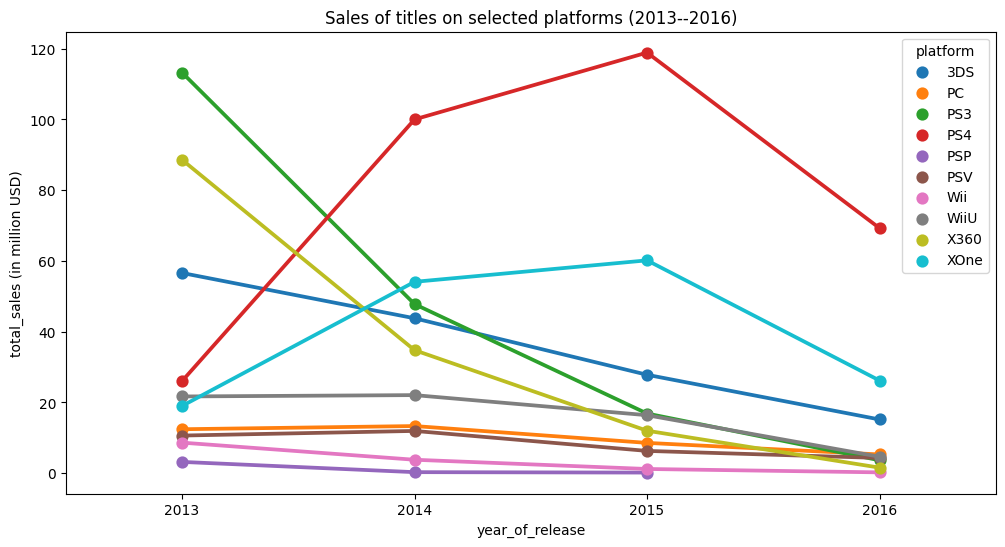

In [322]:
# Visualizing data
plt.figure(figsize=(12, 6))

ax = sns.pointplot(data=recent_top_platforms, x='year_of_release', y='total_sales', hue='platform')

plt.title('Sales of titles on selected platforms (2013--2016)')
plt.ylabel('total_sales (in million USD)')

plt.show()

**Findings & insights**:

Most of the recent top 10 platforms have a downward sales trend. This is natural because they have been released for quite some time and sales in the recent years have been stagnating. However, this does not aply to the newest generation of consoles, PS4 and XBOX One, whose sales are on the rise. Based on these data, the two platforms have the most potential to be successful in the coming year.

In this analysis, sales data in 2016 should be ignored since the year has not ended yet, leading to the aforementioned incompleteness in data and perceived downward trend.

**Recommendations:**
Marketing campaigns should be focused on titles available on PS4 and XBOX One.


### 5. Distribution of sales by platform

In [323]:
recent_sales_by_platform

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,PS4,141.09,15.96,108.74,48.35,314.14
1,PS3,67.81,23.35,63.50,26.77,181.43
2,XOne,51.59,0.34,93.12,14.27,159.32
3,3DS,30.96,67.81,38.20,6.28,143.25
4,X360,42.52,0.51,81.66,12.11,136.80
5,WiiU,19.85,10.88,29.21,4.69,64.63
6,PC,25.36,0.00,11.11,2.96,39.43
7,PSV,6.10,18.59,5.04,3.26,32.99
8,Wii,5.93,0.05,6.56,1.12,13.66
9,PSP,0.17,3.29,0.00,0.04,3.50


In [324]:
recent_sales_by_platform.describe()

,eu_sales,jp_sales,na_sales,other_sales,total_sales
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,35.657273,12.798182,39.791818,10.906364,99.153636
std,41.300134,20.178149,40.353076,14.759058,97.516096
min,0.170000,0.000000,0.000000,0.040000,1.540000
25%,6.015000,0.195000,5.800000,2.040000,23.325000
50%,25.360000,3.290000,29.210000,4.690000,64.630000
75%,47.055000,17.275000,72.580000,13.190000,151.285000
max,141.090000,67.810000,108.740000,48.350000,314.140000


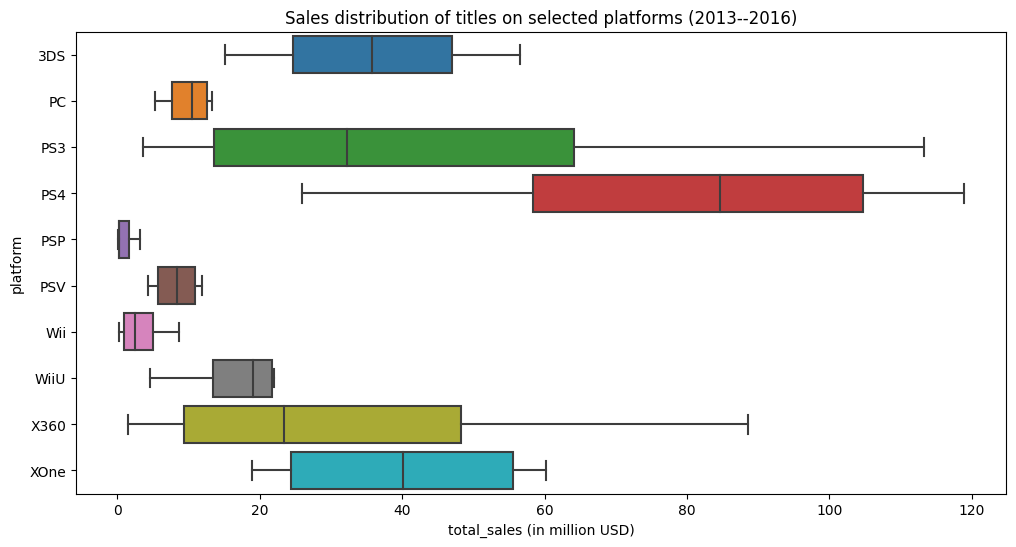

In [370]:
# Visualizing data
plt.figure(figsize=(12, 6))

sns.boxplot(data=recent_top_platforms, x='total_sales', y='platform')

plt.title('Sales distribution of titles on selected platforms (2013--2016)')
plt.xlabel('total_sales (in million USD)')

plt.show()

**Findings:**
In the last 3 years:
1. PS4 generated the most income at \\$314 million, followed by PS3 (\\$181 million).
1. Average sales in North America (\\$150 million) exceeded the mean sales of other regions.
1. Sales distribution varied significantly by platform.

**Insights:**
1. Among the 11 platforms present in the dataset, PS4 had the highest sales.
1. Generally, average North American sales brought in more revenue than the average sales of other regions.
1. Based on the sales distribution, not all platforms performed as well as the others.

**Recommendations:** 
1. Marketing campaigns should be focused on titles available on promising platforms only.
1. PS4 titles seem more promising to market than the XBOX One games.
1. The majority of campaign investments should be put in North America since the region yields higher sales.

### 6. Effect of players' rating on game sales

For this section, we'll be focusing on games available on PS4, the current most popular platform.

In [326]:
ps4_data = recent_data[recent_data['platform'] == 'PS4']
ps4_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,none,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,none,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,none,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,none,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


array([[<AxesSubplot: xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot: xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot: xlabel='total_sales', ylabel='critic_score'>],
       [<AxesSubplot: xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot: xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot: xlabel='total_sales', ylabel='user_score'>],
       [<AxesSubplot: xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot: xlabel='user_score', ylabel='total_sales'>,
        <AxesSubplot: xlabel='total_sales', ylabel='total_sales'>]],
      dtype=object)

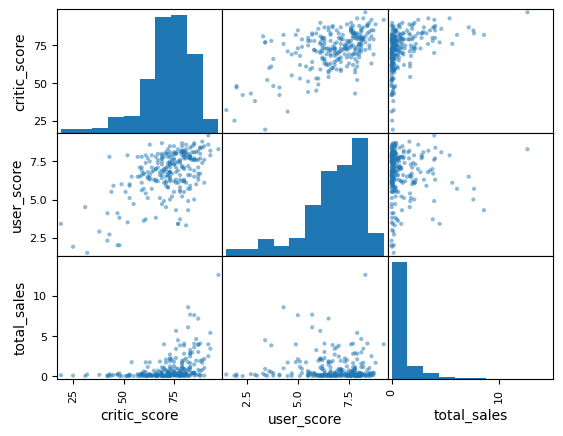

In [327]:
# Visualizing correlation
pd.plotting.scatter_matrix(ps4_data[['critic_score', 'user_score', 'total_sales']])

In [328]:
# Calculating correlation
ps4_data[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


**Findings:**
1. `total_sales` and `critic_score` seem to be weakly correlated with a coefficient of 0.406568.
1. `total_sales` and `user_score` seem to have a minuscule, negative correlation with a coefficient of -0.031957.

**Insights:**
The weak, positive correlation between `total_sales` and `critic_score` imply that better critic ratings are related to a slight rise in overall sales. On the other hand, user ratings and total sales don't seem to have any significant linear correlation.

**Recommendations:**
Planning campaigns for critic-approved titles may be more profitable.

### 7. Sales by genre

In [329]:
# Counting the number of releases per genre
releases_by_genre = recent_data.value_counts('genre')
releases_by_genre = releases_by_genre.reset_index()
releases_by_genre.columns = ['genre', 'count']
releases_by_genre

,genre,count
0,Action,766
1,Role-Playing,292
2,Adventure,245
3,Sports,214
4,Shooter,187
5,Misc,155
6,Racing,85
7,Fighting,80
8,Platform,74
9,Simulation,62


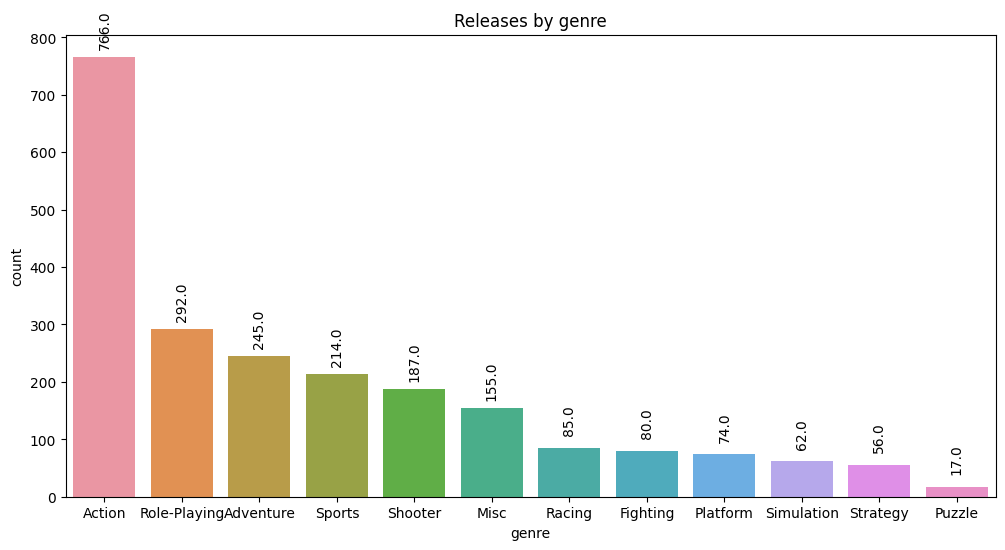

In [330]:
# Visualizing data
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=releases_by_genre, x='genre', y='count')

# Annotating bars
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=90, 
                   textcoords = 'offset points')

plt.title('Releases by genre')

plt.show()

In [331]:
# Aggregating total sales
sales_by_genre = pd.pivot_table(data=recent_data, 
                                index='genre', 
                                values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], 
                                aggfunc='sum')
sales_by_genre.sort_values(by='total_sales', ascending=False, inplace=True)
sales_by_genre = sales_by_genre.reset_index()
sales_by_genre

,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,Action,118.13,40.49,126.05,37.20,321.87
1,Shooter,87.86,6.61,109.74,28.77,232.98
2,Sports,60.52,5.41,65.27,19.45,150.65
3,Role-Playing,36.97,51.04,46.40,11.48,145.89
4,Misc,20.04,9.20,27.49,6.09,62.82
5,Platform,15.58,4.79,18.14,4.12,42.63
6,Racing,20.19,2.30,12.96,4.44,39.89
7,Fighting,8.55,7.65,15.55,3.56,35.31
8,Adventure,8.25,5.82,7.14,2.43,23.64
9,Simulation,10.92,4.52,4.86,1.46,21.76


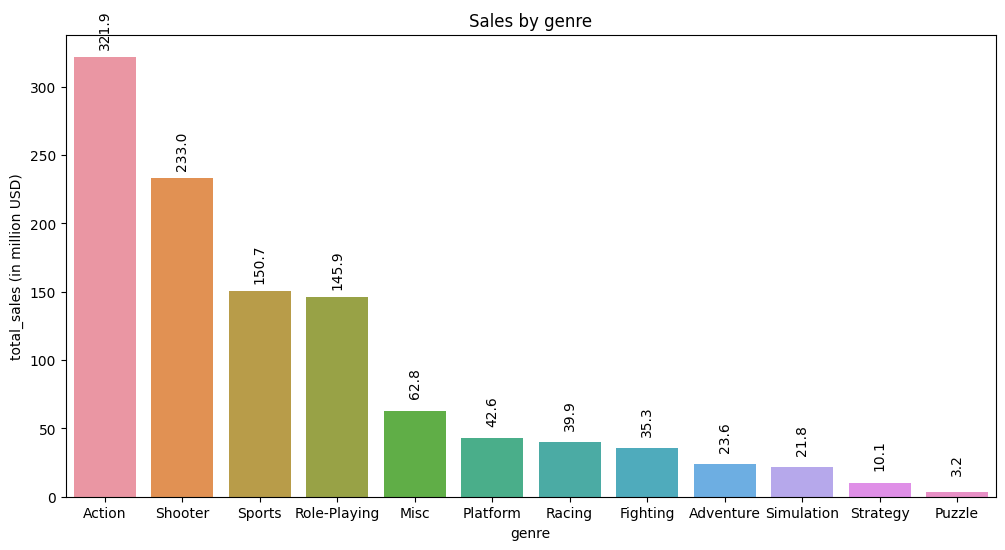

In [332]:
# Visualizing data
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=sales_by_genre, x='genre', y='total_sales')

# Annotating bars
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=90, 
                   textcoords = 'offset points')

plt.title('Sales by genre')
plt.ylabel('total_sales (in million USD)')

plt.show()

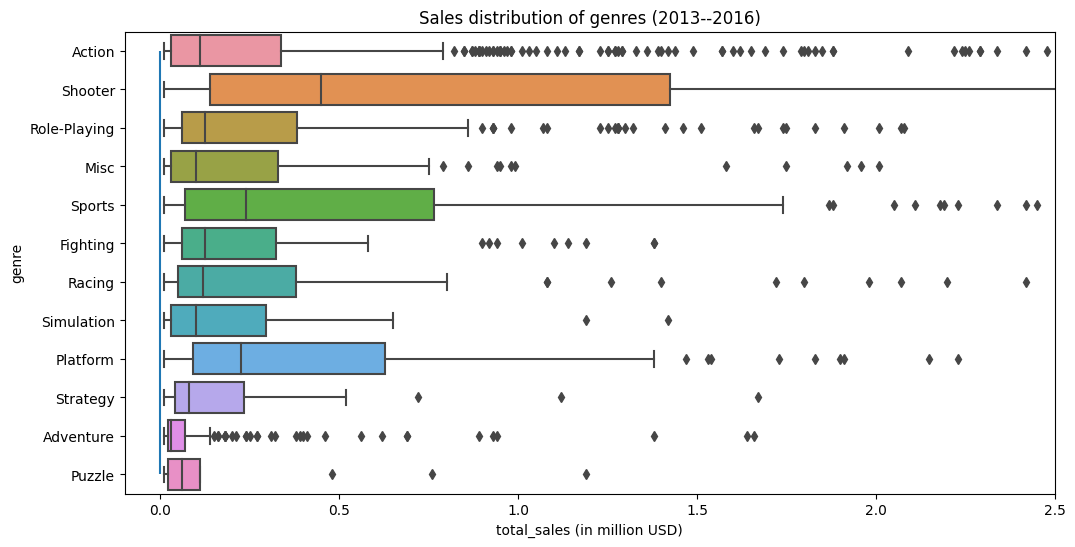

In [371]:
# Visualizing sales distribution
plt.figure(figsize=(12, 6))

sns.boxplot(data=recent_data, x='total_sales', y='genre')

# Removing outliers
plt.xlim(-0.1, 2.5)

# Visualizing the $0 million sales mark
plt.vlines(x=0, ymin=0, ymax=11)

plt.title('Sales distribution of genres (2013--2016)')
plt.xlabel('total_sales (in million USD)')

plt.show()

In [334]:
# Aggregating sales by genre & year
genre_sales_by_year = pd.pivot_table(data=recent_data, index=['genre', 'year_of_release'], values='total_sales', aggfunc='sum')
genre_sales_by_year = genre_sales_by_year.reset_index()
genre_sales_by_year

,genre,year_of_release,total_sales
0,Action,2013,122.51
1,Action,2014,97.23
2,Action,2015,72.02
3,Action,2016,30.11
4,Adventure,2013,6.09
5,Adventure,2014,5.57
6,Adventure,2015,8.16
7,Adventure,2016,3.82
8,Fighting,2013,7.09
9,Fighting,2014,15.85


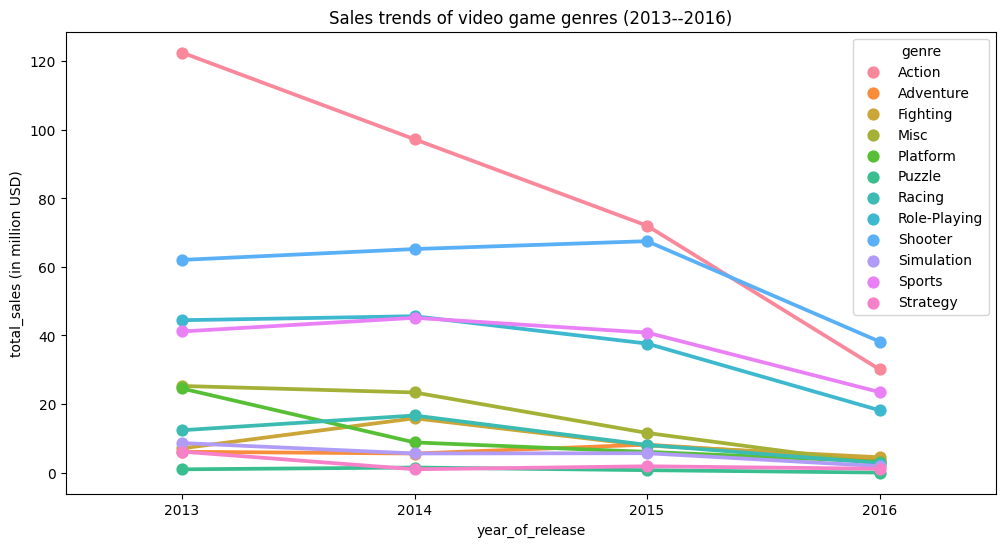

In [372]:
# Visualizing sales trends
plt.figure(figsize=(12, 6))

ax = sns.pointplot(data=genre_sales_by_year, x='year_of_release', y='total_sales', hue='genre')

plt.title('Sales trends of video game genres (2013--2016)')
plt.ylabel('total_sales (in million USD)')

plt.show()

**Findings:**
In the past 3 years:
1. Action games had the most sales at \\$321 million. It is followed by shooter (\\$232) and sports (\\$150).
1. The 5 best-selling genres (action, sports, shooter, role playing) also had the most releases, except for `Misc.` which was supplanted by adventure games.
1. There is some difference in sales distribution of different genres.

**Insights:**
Action games held the title of the best-selling genre in the last 3 years, but the pointplot shows that this trend is changing: action sales have been steadily decreasing from 2013. More recent trends show that sports and shooter games are on the rise, with shooter sales already exceeding action sales this year.

From the boxplot, it can be seen that the sales distribution change from genre to genre, but most genres have similar median somewhere around \\$0.1 million in sales. Shooter has the highest median and IQR of all genres.

**Recommendation:**
Advertising campaigns should promote shooter or sports games since they are likely to be more profitable than games of other genres.

We'll see if this recommendation is valid with further analyses.

### 8. Recently popular titles

Because many new titles get released each year and not many titles are able to maintain their sales for a long time after their release, this section will only be centered on games which were released in 2016.

In [336]:
popular_games = recent_data.query('year_of_release == 2016').sort_values(by='total_sales', ascending=False).head(20)
popular_games = popular_games.reset_index()
popular_games

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
1,108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,none,7.14
2,171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
3,245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
4,289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
5,325,Tom Clancy's The Division,PS4,2016,Shooter,1.35,1.70,0.15,0.60,80.0,7.0,M,3.80
6,571,FIFA 17,XOne,2016,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E,2.65
7,640,Call of Duty: Infinite Warfare,XOne,2016,Shooter,1.46,0.74,0.00,0.22,78.0,3.1,M,2.42
8,708,Far Cry: Primal,PS4,2016,Action,0.60,1.25,0.06,0.35,76.0,6.3,M,2.26
9,709,Battlefield 1,XOne,2016,Shooter,1.28,0.77,0.00,0.20,87.0,8.2,M,2.25


**Findings:**
1. The majority of the 20 best-selling titles of 2016 belong to sports, shooter, or action genres.
1. All of the titles were released on PS4 or XBOX One, with the exception of Pokemon Sun/Moon.

Among the titles, some were released on both PS4 and XBOX One. Comparing the sales of the same title between the two platforms may offer more useful insights.

In [337]:
popular_ps4_xone = popular_games.query('(platform == "PS4") | (platform == "XOne")')
popular_ps4_xone = popular_ps4_xone[popular_ps4_xone.duplicated('name', keep=False) == True]
popular_ps4_xone = popular_ps4_xone.sort_values('total_sales', ascending=False)
popular_ps4_xone

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
3,245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
4,289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
5,325,Tom Clancy's The Division,PS4,2016,Shooter,1.35,1.70,0.15,0.60,80.0,7.0,M,3.80
6,571,FIFA 17,XOne,2016,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E,2.65
7,640,Call of Duty: Infinite Warfare,XOne,2016,Shooter,1.46,0.74,0.00,0.22,78.0,3.1,M,2.42
9,709,Battlefield 1,XOne,2016,Shooter,1.28,0.77,0.00,0.20,87.0,8.2,M,2.25
10,758,Tom Clancy's The Division,XOne,2016,Shooter,1.29,0.68,0.00,0.20,80.0,6.9,M,2.17


We'll pick the titles that made it to the top 10 on both platforms.

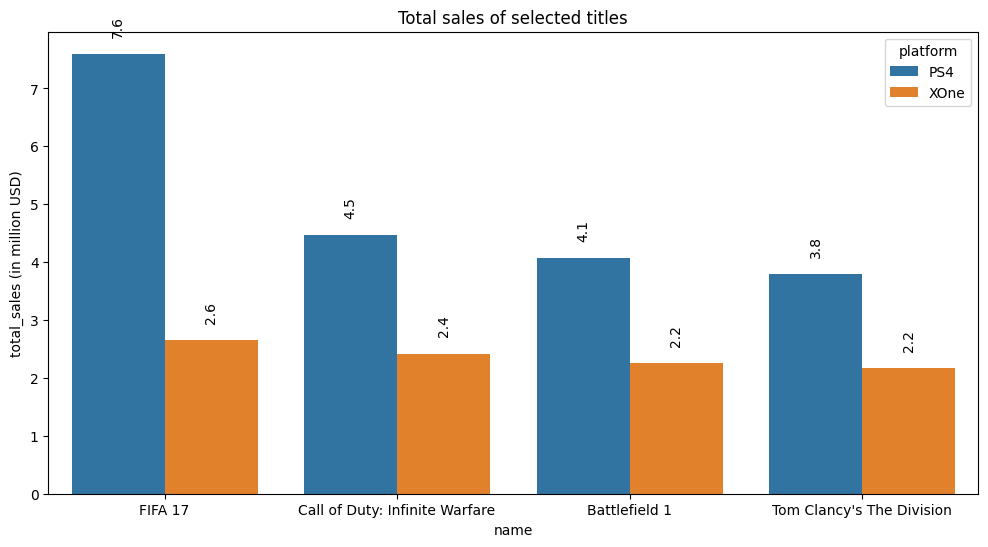

In [338]:
# Visualizing total sales
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=popular_ps4_xone, x='name', y='total_sales', hue='platform')

# Annotating bars
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=90, 
                   textcoords = 'offset points')

plt.title('Total sales of selected titles')
plt.ylabel('total_sales (in million USD)')

plt.show()

PS4 had the highest overall sales across all titles, but dividing the sales by region shows another perspective:

In [339]:
# Rearranging the dataframe to show regional sales
popular_ps4_xone_melt = popular_ps4_xone[['name', 'platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
popular_ps4_xone_melt = popular_ps4_xone_melt.melt(id_vars=['name', 'platform'], 
                                                   value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                                                   var_name='region', 
                                                   value_name='regional_sales')
popular_ps4_xone_melt = popular_ps4_xone_melt.sort_values(by='name')
popular_ps4_xone_melt

,name,platform,region,regional_sales
2,Battlefield 1,PS4,na_sales,1.10
22,Battlefield 1,XOne,jp_sales,0.00
6,Battlefield 1,XOne,na_sales,1.28
18,Battlefield 1,PS4,jp_sales,0.21
10,Battlefield 1,PS4,eu_sales,2.15
26,Battlefield 1,PS4,other_sales,0.61
14,Battlefield 1,XOne,eu_sales,0.77
30,Battlefield 1,XOne,other_sales,0.20
17,Call of Duty: Infinite Warfare,PS4,jp_sales,0.15
1,Call of Duty: Infinite Warfare,PS4,na_sales,1.61


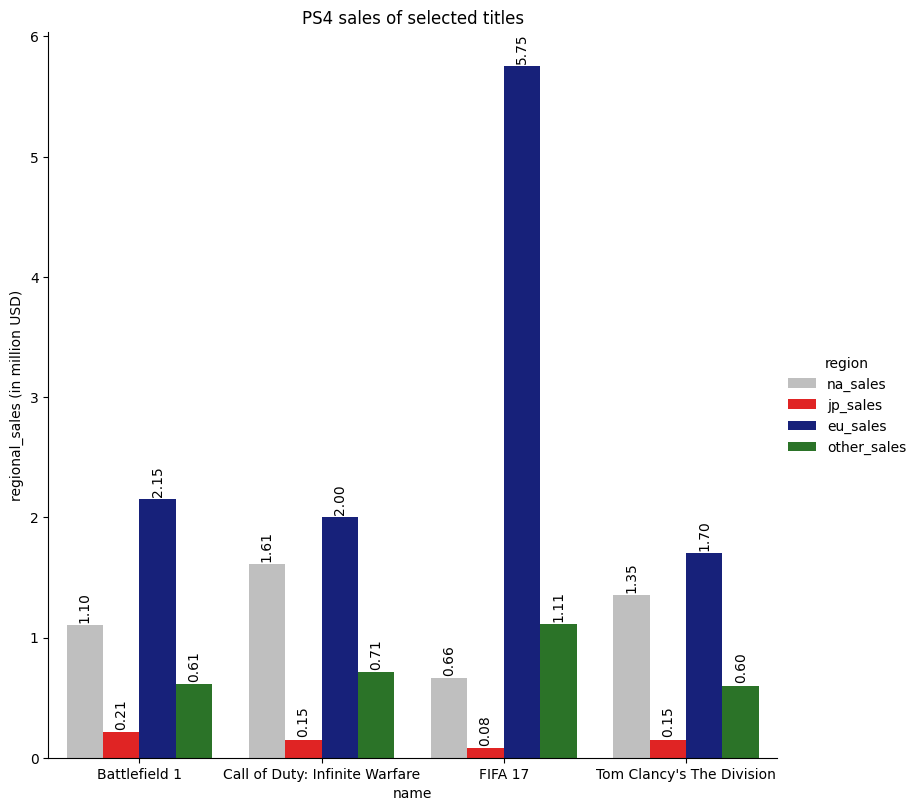

In [340]:
# Visualizing PS4's regional sales
g = sns.catplot(data=popular_ps4_xone_melt.query('platform == "PS4"'), 
                 x='name', y='regional_sales', hue='region', 
                 palette=dict(na_sales='#bfbfbf', eu_sales='#07148a', jp_sales='#ff0505', other_sales='#20801b'), 
                 height=8, aspect=1, kind='bar')

for container in g.ax.containers:
    g.ax.bar_label(container, fmt='%.2f', padding=2, rotation=90)

plt.title('PS4 sales of selected titles')
plt.ylabel('regional_sales (in million USD)')

plt.show()

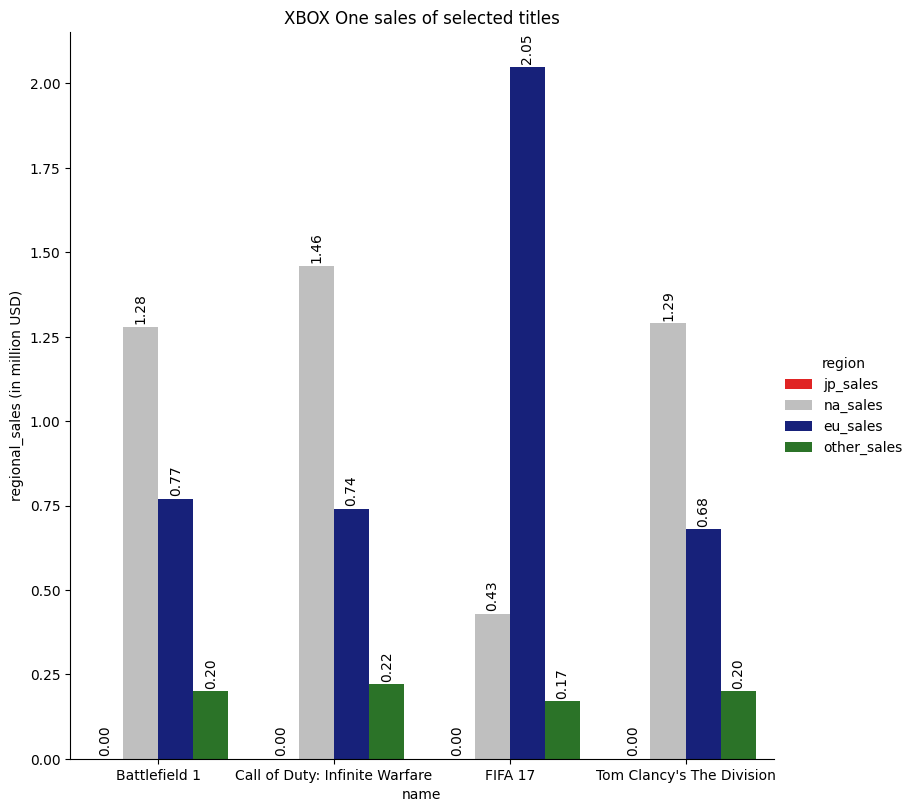

In [341]:
# Visualizing XOne's regional sales
g = sns.catplot(data=popular_ps4_xone_melt.query('platform == "XOne"'), 
                 x='name', y='regional_sales', hue='region', 
                 palette=dict(na_sales='#bfbfbf', eu_sales='#07148a', jp_sales='#ff0505', other_sales='#20801b'),
                 height=8, aspect=1, kind='bar')

for container in g.ax.containers:
    g.ax.bar_label(container, fmt='%.2f', padding=2, rotation=90)

plt.title('XBOX One sales of selected titles')
plt.ylabel('regional_sales (in million USD)')

plt.show()

In [342]:
popular_ps4_xone_melt.sort_values(by='regional_sales',ascending=False)

,name,platform,region,regional_sales
8,FIFA 17,PS4,eu_sales,5.75
10,Battlefield 1,PS4,eu_sales,2.15
12,FIFA 17,XOne,eu_sales,2.05
9,Call of Duty: Infinite Warfare,PS4,eu_sales,2.00
11,Tom Clancy's The Division,PS4,eu_sales,1.70
1,Call of Duty: Infinite Warfare,PS4,na_sales,1.61
5,Call of Duty: Infinite Warfare,XOne,na_sales,1.46
3,Tom Clancy's The Division,PS4,na_sales,1.35
7,Tom Clancy's The Division,XOne,na_sales,1.29
6,Battlefield 1,XOne,na_sales,1.28


**Findings:**
1. FIFA 17 was the best-selling game worldwide in 2016, followed by Call of Duty: Infinite Warfare. Both had the highest sales on PS4.
1. FIFA 17 had higher sales in the EU than in North America. CoD: IW surpassed it as the most popular title in North America.

In each of the top 4 titles:
1. Overall sales were higher on PS4 than on XBOX One.
1. PS4 titles had overall higher sales than those on XBOX One.
1. Sales of XBOX One games mainly come from North America.
1. `critic_score` exceeded 70 points.

**Insights:**
1. PS4 titles were generally more profitable than XBOX One titles.
1. People across the world preferred playing the same titles on PS4.
1. XBOX One was more popular in North America than the rest of the world, but even then, it could not beat PS4 in game sales.
1. Each of the top 4 titles had high critical rating.

**Recommendations:**
It would be more profitable to promote games that are:
1. in the sports or shooter genres,
1. well-received by critics,
1. available on PS4.

Among the top 4 titles, he most promising title to promote differed by region, but all of them sold better on PS4:
1. FIFA 17 in the EU and other regions,
1. CoD: IW in North America,
1. Battlefield 1 in Japan.

### User profiling by region

For this section, we will reuse the dataframes that we have created above.

#### Top 5 platforms by region

In [343]:
recent_sales_by_platform

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,PS4,141.09,15.96,108.74,48.35,314.14
1,PS3,67.81,23.35,63.50,26.77,181.43
2,XOne,51.59,0.34,93.12,14.27,159.32
3,3DS,30.96,67.81,38.20,6.28,143.25
4,X360,42.52,0.51,81.66,12.11,136.80
5,WiiU,19.85,10.88,29.21,4.69,64.63
6,PC,25.36,0.00,11.11,2.96,39.43
7,PSV,6.10,18.59,5.04,3.26,32.99
8,Wii,5.93,0.05,6.56,1.12,13.66
9,PSP,0.17,3.29,0.00,0.04,3.50


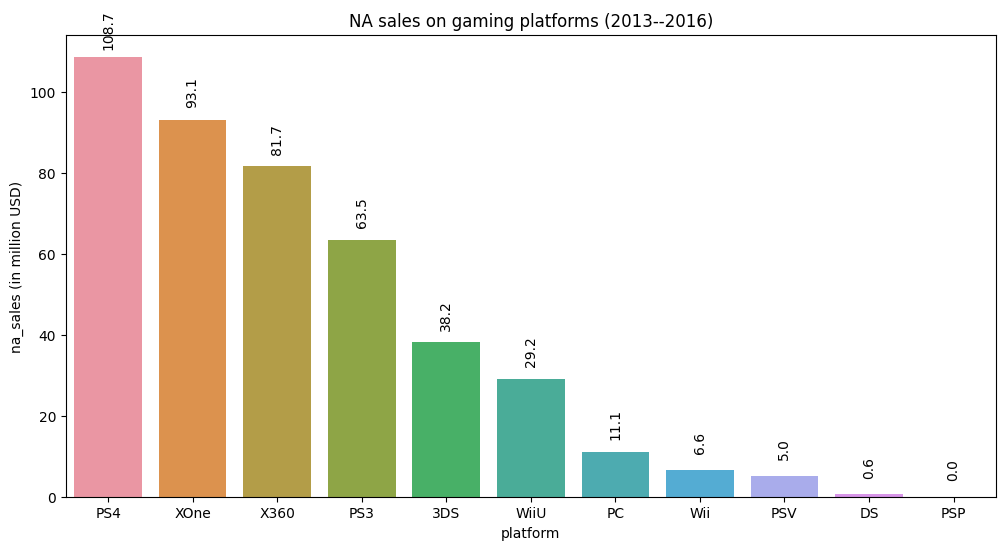

In [349]:
# NA
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=(recent_sales_by_platform.sort_values(by='na_sales', ascending=False)), 
                 x='platform', y='na_sales')

# Annotating bars
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=90, 
                   textcoords = 'offset points')

plt.title('NA sales on gaming platforms (2013--2016)')
plt.ylabel('na_sales (in million USD)')

plt.show()

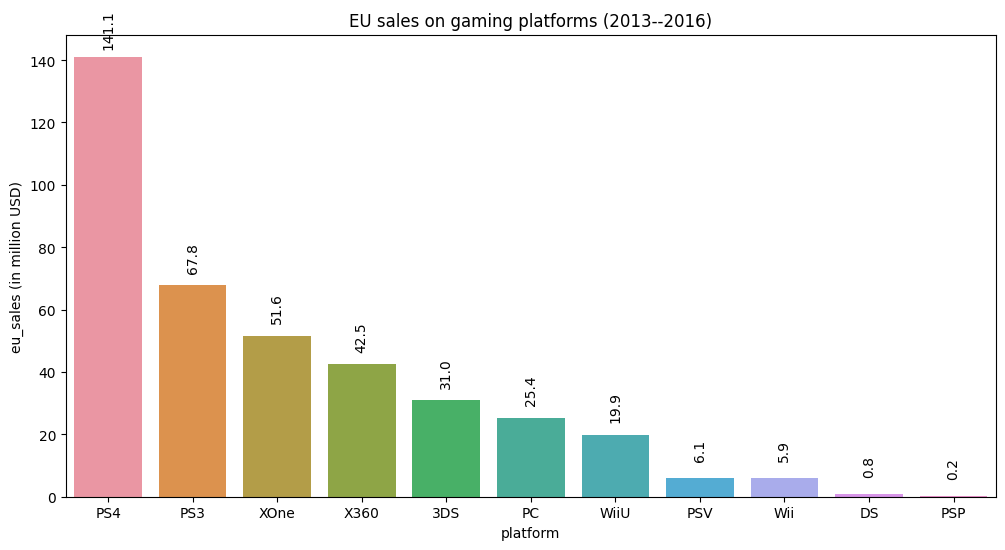

In [350]:
# EU
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=(recent_sales_by_platform.sort_values(by='eu_sales', ascending=False)), 
                 x='platform', y='eu_sales')

# Annotating bars
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=90, 
                   textcoords = 'offset points')

plt.title('EU sales on gaming platforms (2013--2016)')
plt.ylabel('eu_sales (in million USD)')

plt.show()

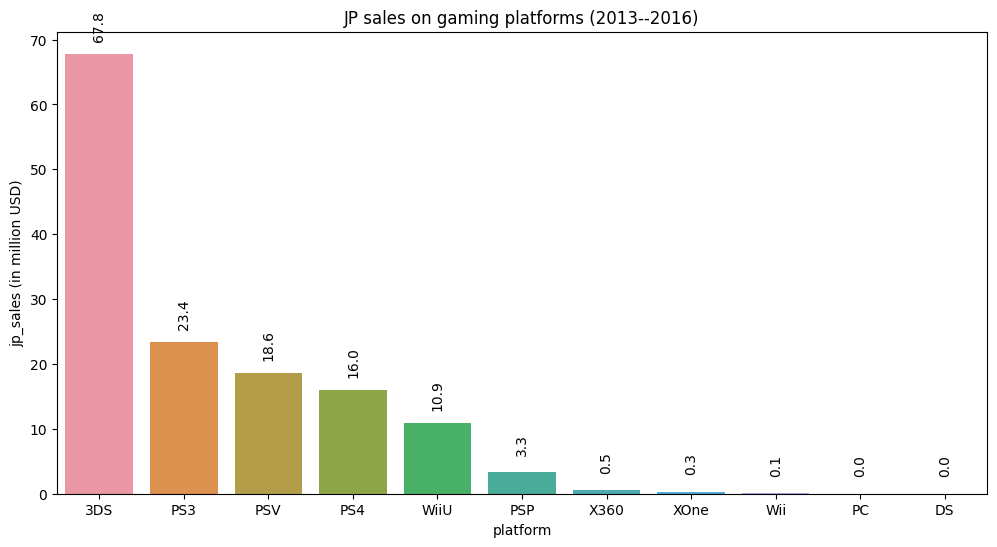

In [351]:
# JP
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=(recent_sales_by_platform.sort_values(by='jp_sales', ascending=False)), 
                 x='platform', y='jp_sales')

# Annotating bars
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=90, 
                   textcoords = 'offset points')

plt.title('JP sales on gaming platforms (2013--2016)')
plt.ylabel('jp_sales (in million USD)')

plt.show()

**Findings:**
From 2006--2016, the top 5 platforms for each region are:
1. North America:
    1. PS4
    1. XBOX One
    1. XBOX 360
    1. PS3
    1. 3DS
1. Europe:
    1. PS4
    1. PS3
    1. XBOX One
    1. XBOX 360
    1. 3DS
1. Japan:
    1. 3DS
    1. PS3
    1. PSV
    1. PS4
    1. WiiU
    <br> XBOX One (8th place) titles failed to sell above \\$1 million.

**Insights:**
1. Games for Microsoft's XBOX tend to sell better in their home region, North America, but don't have much sales footprint in Japan.
1. Games for Sony's PlayStation (excluding PlayStation Portable) sell pretty well across the world.
1. In the West, games available on Nintendo platforms usually sell behind those available on Sony and Microsoft platforms. However, the reverse is true in Japan.
1. Japanese gamers seem to prefer games available on handheld consoles (3DS, PSV) over those on non-portable platforms.

**Recommendations:**
Promoting games based on the target market's preferred platforms can bring in more profit. The most recent preferred platforms by region are:
1. PS4 and XBOX One in North America,
1. PS4 in Europe,
1. 3DS and PS4 in Europe.

#### Top 5 genres by region

In [347]:
sales_by_genre

,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,Action,118.13,40.49,126.05,37.20,321.87
1,Shooter,87.86,6.61,109.74,28.77,232.98
2,Sports,60.52,5.41,65.27,19.45,150.65
3,Role-Playing,36.97,51.04,46.40,11.48,145.89
4,Misc,20.04,9.20,27.49,6.09,62.82
5,Platform,15.58,4.79,18.14,4.12,42.63
6,Racing,20.19,2.30,12.96,4.44,39.89
7,Fighting,8.55,7.65,15.55,3.56,35.31
8,Adventure,8.25,5.82,7.14,2.43,23.64
9,Simulation,10.92,4.52,4.86,1.46,21.76


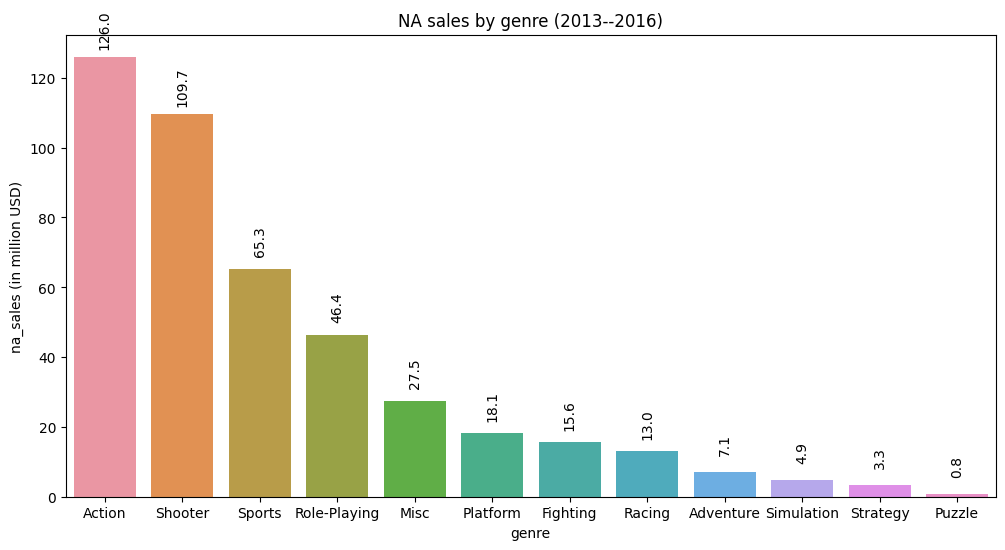

In [352]:
# NA
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=(sales_by_genre.sort_values(by='na_sales', ascending=False)), 
                 x='genre', y='na_sales')

# Annotating bars
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=90, 
                   textcoords = 'offset points')

plt.title('NA sales by genre (2013--2016)')
plt.ylabel('na_sales (in million USD)')

plt.show()

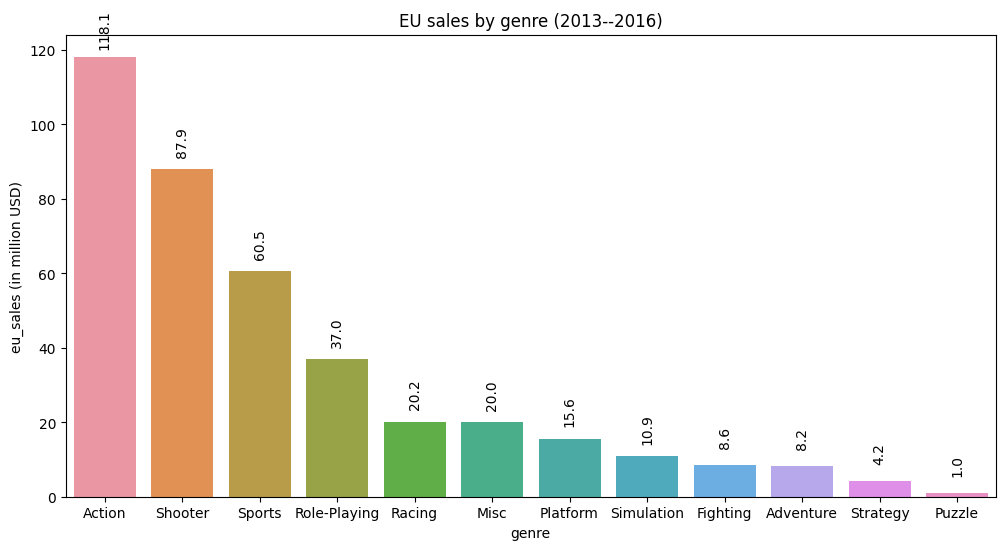

In [353]:
# EU
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=(sales_by_genre.sort_values(by='eu_sales', ascending=False)), 
                 x='genre', y='eu_sales')

# Annotating bars
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=90, 
                   textcoords = 'offset points')

plt.title('EU sales by genre (2013--2016)')
plt.ylabel('eu_sales (in million USD)')

plt.show()

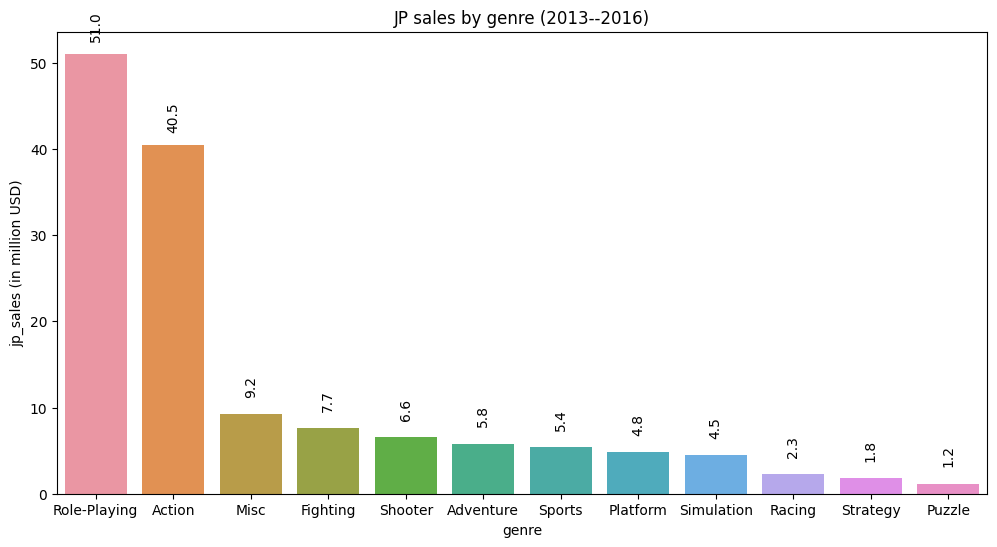

In [354]:
# JP
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=(sales_by_genre.sort_values(by='jp_sales', ascending=False)), 
                 x='genre', y='jp_sales')

# Annotating bars
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=90, 
                   textcoords = 'offset points')

plt.title('JP sales by genre (2013--2016)')
plt.ylabel('jp_sales (in million USD)')

plt.show()

**Findings:**
From 2006--2016, the top 5 platforms for each region are:
1. North America:
    1. Action
    1. Shooter
    1. Sports
    1. Role-playing
    1. Miscellaneous
    <br>Racing sits at the 8th place.
1. Europe:
    1. Action
    1. Shooter
    1. Sports
    1. Role-playing
    1. Racing
    <br>Misc. is at the 6th position.
1. Japan:
    1. Role-playing
    1. Action
    1. Miscellaneous
    1. Fighting
    1. Shooter
    <br>Racing falls behind at the 10th position.

**Insights:**
1. Across the three regions, action, shooter, and role-playing have always made it to the top 5 genres.
1. People in North America seem to prefer miscellaneous genres over racing. Conversely, people in Europe prefer racing games over miscellaneous games. This is the only difference in the top 5 genres between the two regions.
1. Role-playing is the most popular genre in Japan. Meanwhile, sports and racing titles are not as popular there as in the West.

**Recommendations:**
The campaign should pick titles that belong to the 5 top genres of the target region to maximize profits.

#### Effect of ESRB rating on sales by region

In [355]:
# Aggregating data
rating_sales = pd.pivot_table(data=recent_data, 
                               index='rating', 
                               values=['na_sales', 'eu_sales', 'jp_sales'], 
                               aggfunc='sum')
rating_sales = rating_sales.reset_index()

# Melting dataframe
rating_sales = rating_sales.melt(id_vars='rating', 
                                value_vars=['na_sales', 'eu_sales', 'jp_sales'], 
                                var_name='region', 
                                value_name='regional_sales')
rating_sales

,rating,region,regional_sales
0,E,na_sales,79.05
1,E10+,na_sales,54.24
2,M,na_sales,165.21
3,T,na_sales,49.79
4,none,na_sales,89.42
5,E,eu_sales,83.36
6,E10+,eu_sales,42.69
7,M,eu_sales,145.32
8,T,eu_sales,41.95
9,none,eu_sales,78.91


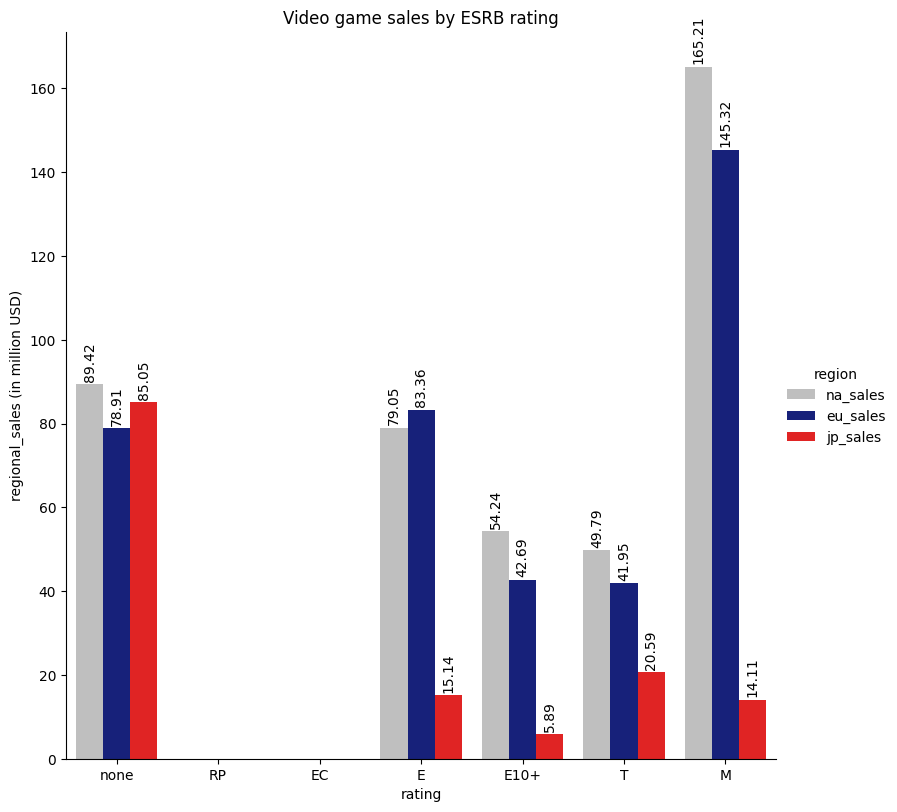

In [356]:
# Visualizing data
g = sns.catplot(data=rating_sales, 
                 x='rating', y='regional_sales', hue='region', 
                 palette=dict(na_sales='#bfbfbf', eu_sales='#07148a', jp_sales='#ff0505'), 
                 height=8, aspect=1, kind='bar',
                 order=['none', 'RP', 'EC', 'E', 'E10+', 'T', 'M'])

for container in g.ax.containers:
    g.ax.bar_label(container, fmt='%.2f', padding=2, rotation=90)

plt.title('Video game sales by ESRB rating')
plt.ylabel('regional_sales (in million USD)')

plt.show()

**Findings:**
From 2013--2016, titles with the following ESRB ratings had the highest sales, in descending order:
1. North America:
    1. M (Mature)
    1. (no rating)    
    1. E (Everyone)
    1. E10+ (Everyone above 10)
    1. T (Teen)
1. Europe:
    1. M (Mature)
    1. E (Everyone)
    1. (no rating)    
    1. E10+ (Everyone above 10)
    1. T (Teen)
1. Japan:
    1. (no rating)
    1. T (Teen)
    1. E (Everyone)
    1. M (Mature)
    1. E10+ (Everyone above 10)
    
There were no data on the sales of EC (Early Childhood) and RP (Rating Pending) games.

**Insights:**
1. In NA & EU, the 3 best-selling ratings were M, unrated, and E.
1. In Japan, games with no ESRB rating topped the sales, followed by T, E, and M. 

This is possibly due to Japanese publishers not applying for a rating by the ESRB, since Japan is outside of their jurisdiction. EU, which is also outside of ESRB's area of operations, have similar demographics to NA, possibly due to having similar preferences to NA and better access to the Western market and the English language.

**Recommendations:**
Games intended for Mature audiences seem to be the safest choice to market in the West. However, marketing games without an ESRB rating has the possibility of returning higher profits in Japan.

### User-rating related hypothesis tests

Next, we will conduct Student's two-sample t-tests to assess whether or not the following hypotheses are true. For these tests to work, we need to exclude rows with missing values from the data:

In [359]:
# Dropping missing values
user_rating_no_na = recent_data.dropna(subset='user_score')
user_rating_no_na['user_score'].isna().sum()

0

#### 1. Average user rating of titles on XBOX One and PC

Since XBOX One and PC are both released by Microsoft, they may provide similar user experience, which may lead to similar user ratings. This proposal can be written as the following null hypothesis:

**H<sub>a</sub>: The mean user rating of XBOX One and PC titles are equal.**

Conversely, the opposite proposal can be written as the alternate hypothesis:

**H<sub>0</sub>: The mean user rating of XBOX One and PC titles are not equal.**

To test these hypotheses, we will be a two-tailed test with a confidence interval of 95%, giving us an alpha/significance level of 5%. The result of Levene's test as shown below (`p-value > 0.05`) indicates that the two samples have equal variances.

In [360]:
xone_user_score = user_rating_no_na.query('platform == "XOne"')['user_score']
pc_user_score = user_rating_no_na.query('platform == "PC"')['user_score']

platform_levene = st.levene(xone_user_score, pc_user_score)
print("p-value: " + str(platform_levene.pvalue))
if platform_levene.pvalue > 0.05:
    print('The two samples have equal variances')
elif platform_levene.pvalue < 0.05:
    print('The two samples do not have equal variances')

p-value: 0.0038975531101303022
The two samples do not have equal variances


In [362]:
# t-testing
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=True)
print('p-value: ', results.pvalue)
if results.pvalue > 0.05:
    print('We reject the alternate hypothesis')
elif results.pvalue < 0.05:
    print('We reject the null hypothesis')

p-value:  0.14012658403611647
We reject the alternate hypothesis


Student's t-test returned a p-value of `0.14012658403611647`, which is higher than our `0.05` level of significance. Thus, we **failed to reject our null hypothesis**, meaning that **the mean user rating of XBOX One and PC titles are far more likely than not to be equal.**

#### 2. Average user rating of action and sports genres

While the two genres involve a high degree of body movement of on-screen characters, the average user rating between them may be different. We can write our null proposal as such:

**H<sub>0</sub>: The mean user rating of action and sports genres are equal.**

The opposite idea can be written as the alternate hypothesis:

**H<sub>a</sub>: The mean user rating of action and sports genres are not equal.**

To test the above hypotheses, we will be using the Student's two-tailed two-sample t-test with a confidence interval of 95%, giving us an alpha/significance level of 5%. The result of Levene's test as shown below (`p-value < 0.05`) rejects the proposal that the two samples have equal variances.

In [363]:
action_user_score = user_rating_no_na.query('genre == "Action"')['user_score']
sports_user_score = user_rating_no_na.query('genre == "Sports"')['user_score']

genre_levene = st.levene(action_user_score, sports_user_score)
print("p-value: " + str(genre_levene.pvalue))
if genre_levene.pvalue > 0.05:
    print('The two samples have equal variances')
elif genre_levene.pvalue < 0.05:
    print('The two samples do not have equal variances')

p-value: 4.256668821827404e-07
The two samples do not have equal variances


In [364]:
# t-testing
results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)
print('p-value: ', results.pvalue)
if results.pvalue > 0.05:
    print('We reject the alternate hypothesis')
elif results.pvalue < 0.05:
    print('We reject the null hypothesis')

p-value:  1.4460039700704318e-20
We reject the null hypothesis


The extremely small p-value (1.4460039700704318 * 10<sup>-10</sup>) indicates that there is no assumption of the null hypothesis. Therefore, we **reject the null hypothesis**, statistically suggesting that **the two genres have a different mean user rating**.

## Conclusions

We were given a dataset containing the sales of video game titles.

Before conducting any analysis, the following changes were made to the dataset:
1. Column names were converted to snake case/lower case letters.
1. Two rows containing `NaN` values in `name` and `genre` were dropped.
1. The missing values in `year_of_release` were filled with the placeholder value of `0`.
1. `year_of_release` was converted to `int32`.
1. Missing values in `critic_score` and `user_score` were left as is.
1. `tbd` values in `user_score` were replaced by `NaN`, and the column's data type was changed to `float64`.
1. `NaN` values in `rating` were filled with the placeholder value `none`.
1. `K-A`, the former name for `E` rating, was changed to `E`.
1. The combined sales of all regions were aggregated in the `total_sales` column.

In EDA, we found out that:
1. The number of video game releases vary throughout the years, with an average of 451 titles being released annually.
1. A new generation of platforms usually get released within a decade (somewhere around 6--8 years) of the previous generation's launch.
1. Most platforms have a lifespan of 10 years, meaning that they commonly get completely replaced by a new generation of platforms in a decade.
<br> Seeing that not all data from 1980 will be relevant to the current trends, the following analyses were conducted on data of the past 3 years (2013--2016), with the release of the new generation of platforms as our starting point.
1. Game sales are rising on the newest platforms, PS4 and XBOX One. Among the two, PS4 sells better on the market.
1. Critic ratings have some positive correlation with a game's sales, while user ratings don't exhibit the same trait.
    
Through user profiling of each region, we discovered that:
1. PS4 is the most commonly used platform across the world.
1. Japanese gamers seem to prefer handheld consoles over non-portable platforms.
1. Action, shooter, and role-playing genres are the choice of genres in all of the 3 regions profiled. Role-playing is most popular in Japan, whereas in the West, it falls behind shooter games.
1. Games rated M and E by ESRB have the best sales worldwide. Unrated games also sell well throughout the world, notably surpassing the sales of other games in Japan.

With regard to the average user rating:
1. the mean rating of XBOX One and PC titles are equal.
1. the mean rating of action and sports titles are not equal.

Considering the information detailed above, it is **recommended to plan a campaign to North American players** to promote a game that is:
1. available on PS4,
1. well-received by critics,
1. in the action, shooter, or role-playing genres,
1. rated for Everyone, Mature, or unrated by ESRB.

The top 5 games that fit the above criteria are:

In [368]:
first_query = ('(year_of_release == 2016) & (platform == "PS4") & (critic_score > 70)')
second_query = ('(genre == "Action") | (genre == "Sports") | (genre == "Shooter") | (genre == "Misc") | (genre == "Role-Playing")')
third_query = ('(rating == "E") | (rating == "M") | (rating == "none")')

final_selection = recent_data.query(first_query)
final_selection = final_selection.query(second_query)
final_selection = final_selection.query(third_query)
final_selection.sort_values(by='na_sales', ascending=False).head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
325,Tom Clancy's The Division,PS4,2016,Shooter,1.35,1.70,0.15,0.60,80.0,7.0,M,3.80
921,NBA 2K17,PS4,2016,Sports,1.25,0.27,0.02,0.34,88.0,6.7,E,1.88
1007,Madden NFL 17,PS4,2016,Sports,1.25,0.17,0.00,0.32,82.0,4.9,E,1.74
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07


Thus, promoting **Call of Duty: Infinite Warfare** (or other upcoming titles with similar characteristics) to **North American players** has the highest possibility of bringing in the highest revenue.